In [1]:
import matplotlib.pyplot as plt
import math
import pandas
import numpy as np
import plotly.express as px 
import plotly.graph_objects as go
import plotly

# Palindrome Generation
We start by generating a list of the first n iterations of the lychrel process on 196.

In [120]:
pal = 196
n = 0
n_final = 100

# generator, break condition removed as we can save computation time
def lychrel_generator(start) :
    a = start
    b = a + int(str(a)[::-1])
    while True :
        yield a
        a , b = b , b + int(str(b)[::-1])

lychrel_gen = lychrel_generator(pal)


title_text = "Frequency Of Digits for " + str(n_final) + " Steps of the Lychrel Process on 196" 
image_title = "images/196DigitDistributionForN" + str(n_final)

In [121]:
digits = list( map( str, list(range(0,10))))
distr_list = [0, 0, 0, 0, 0, 0, 0, 0 ,0 ,0]


lychrel_char_gen = lychrel_generator(pal)

i=0
for char in lychrel_char_gen:
    if i > n_final :
        break
    else:
        #print(char)
        digit_list = map(int, list(str(char)))
        for digit in digit_list:
                #print("increasing", digit, "by one")
                distr_list[digit] += 1
        print(i)
        i += 1
        
name = "datasets/DigitDistribution" + str(n_final) +".txt"
with open(name, "w") as output:
    output.write(str(distr_list))

print(distr_list)
print(digits)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
[208, 266, 235, 242, 260, 251, 249, 299, 251, 233]
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


Then we want to analyse the distribution of integers above some arbitrary cut off point.

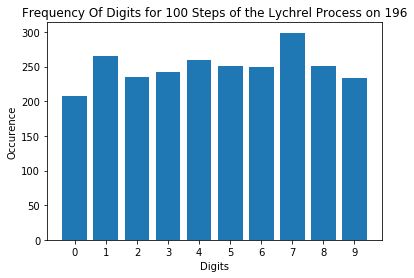

In [122]:
plt.bar(digits, distr_list)
plt.title(title_text)
plt.xlabel("Digits")
plt.ylabel("Occurence")
plt.savefig(image_title, dpi = 400)
plt.show()

In [123]:
title_text = "Frequency Of Digits for " + str(n_final) + " Steps of the Lychrel Process on 196" 
bar_color = '#ffffff'
if n_final <= 100:
    bar_color = '#FCBA04'
    text_color = '#dfdfbf'
elif n_final <= 1000:
    bar_color = '#EB5160'
    text_color = '#dfbfbf'
elif n_final <= 10000:
    bar_color = '#67E0A3'
    text_color = '#bfdfbf'
elif n_final <= 100000:
    bar_color = '#822E81'
    text_color = '#dfbfdf'
elif n_final <= 1000000:
    bar_color = '#0D97FC'
    text_color = '#bfcfdf'

fig = go.Figure([go.Bar(x=digits, y=distr_list, marker=dict(color=bar_color))])

fig.update_layout(
    title={
        'text': title_text,
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}
    , xaxis={
        'spikemode' : 'across',
        'spikesnap' : 'data',
        'spikethickness' : 1,
        'spikedash' : 'solid',
        'spikecolor' : '#0f0f0f',
        'gridcolor' : '#3d4752',
        'gridwidth' : 0.5,
        'type' : 'category'        
    }     
    , yaxis = {
        'gridcolor' : '#3d4752',
        'gridwidth' : 0.5,
        'zeroline' : False,
    }
    , xaxis_title="Digits"
    , yaxis_title="Quantity"
    , hoverlabel_align = 'right'
    , hovermode = 'x'
    , spikedistance = -1
    , plot_bgcolor='#292f36'
    , paper_bgcolor = "rgba(0,0,0,0)"
    , font=dict(
        family="sans-serif",
        size=13,
        color=text_color
    )
)



fname = "graph/Distribution" + str(n_final) +".html"
plotly.offline.plot(fig, filename=fname)


fig.show()

From this distribution of the first 100000 iterations of the n-step palindrome process, it seems unlikely that a higher prevalence of any given number is responsible of 196's stubborness to converge on a palindrome.

It would appear that 0 or 9 is slightly more common in this sequence. This does make some sense as it makes sense that final 9's would cause carrying to occus which could disrupt the process, but again I am unsure if this is of significance.

A more rigorous investigation will to be investigate the patterns of more seed Lychrel numbers and non-seed numbers.